# Exploring Neural Networks using the Iris dataset
<img style="float: left;" src="Iris_Blue_Magic.jpg">

### In this tutorial we will build a neural network to classify irises (flowers) based on their features. 

##### We begin by importing some necessary libraries

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
%matplotlib inline

### With any problem dealing with randomness, it's a good idea to set a random seed so that results are reproducible and easier to debug.

In [2]:
seed = 123
numpy.random.seed(seed)

## Step 1: Load the data 

In [3]:
df = pandas.read_csv("Iris.csv", header=None)
dataset = df.values
X = dataset[1:,1:5].astype(float)
Y = dataset[1:,5]

#### It's a good idea to look at the data to understand what it is. In this case, we have 150 flowers that have been classified into Iris-setosa, Iris-versicolor, and Iris-virginica. The features are sepal length in cm, sepal width in cm, petal length in cm, and petal width in cm.

In [4]:
df.head(5)

,0,1,2,3,4,5
0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa


#### Why do we need machine learning for this problem?
##### As you can see from the plots below, Iris-setosa is linearly separable from the other two types but Iris-virginica and Iris-versicolor cannot be separated by a line or plane.

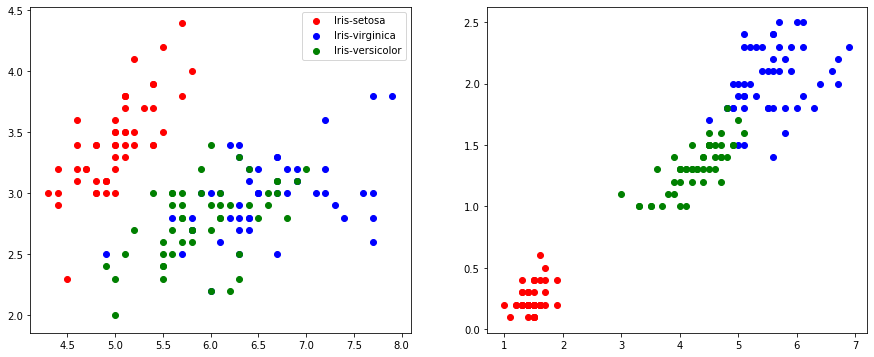

In [5]:
index = [numpy.nonzero(Y=='Iris-setosa')[0].ravel(),numpy.nonzero(Y=='Iris-virginica')[0].ravel(),numpy.nonzero(Y=='Iris-versicolor')[0].ravel()]

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(X[index[0],0],X[index[0],1],color='r',label='Iris-setosa')
plt.scatter(X[index[1],0],X[index[1],1],color='b',label ='Iris-virginica' )
plt.scatter(X[index[2],0],X[index[2],1],color='g',label = 'Iris-versicolor')
plt.legend()
plt.subplot(1,2,2)
plt.scatter(X[index[0],2],X[index[0],3],color='r',label='Iris-setosa')
plt.scatter(X[index[1],2],X[index[1],3],color='b',label ='Iris-virginica' )
plt.scatter(X[index[2],2],X[index[2],3],color='g',label = 'Iris-versicolor')
plt.show()

## Step 2: Build the neural network

In [6]:
mlp = MLPClassifier(hidden_layer_sizes=(100,200,),early_stopping=True)

## Step 3: Train the neural network
#### Run cross validation

In [7]:
mlp.fit(X,Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(100, 200), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [8]:
y_pred = mlp.predict(X)

The best way to look at accuracy is by doing cross validation. The function below does 5 fold cross validation and gives us the accuracy for each fold.

In [9]:
cross_val_score(mlp,X,Y)

array([1.        , 0.33333333, 0.86666667, 0.93333333, 0.8       ])

In [10]:
numpy.mean(cross_val_score(mlp,X,Y))

0.7533333333333333